In [1]:
import cf_xarray as cfxr
import numpy as np
import xarray as xr
import xesmf as xe

import cordex as cx

In [2]:
import os

os.environ["SPARSE_AUTO_DENSIFY"] = "1"

In [3]:
ds = xr.open_dataset(
    "/pool/data/CORDEX/data/cordex/output/EUR-11/GERICS/MPI-M-MPI-ESM-LR/historical/r3i1p1/GERICS-REMO2015/v1/mon/tas/v20190925/tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r3i1p1_GERICS-REMO2015_v1_mon_195002-195012.nc"
)
# ds = xr.open_dataset("/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/tas/gn/v20190710/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-185412.nc")
# ds = xr.open_dataset("/work/ch0636/remo/forcing-data/gfiles/ERA5/1979/g056530a1979010100.nc")
ds

<xarray.Dataset>
Dimensions:                     (time: 11, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1950-02-15 ... 1950-12-...
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.72 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.16
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] ...
    rotated_latitude_longitude  int32 ...
    lat_vertices                (rlat, rlon, vertices) float32 ...
    lon_vertices                (rlat, rlon, vertices) float32 ...
    tas                         (time, rlat, rlon) float32 ...
Attributes: (12/34)
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  historical
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    forcing:                        N/A
    ...                             ...
    title:                          GERICS-REMO2015 model output prepared for...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    3
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/7e847054-073c-46be-9fd4-606d...

In [146]:
ds = cx.cordex_domain("EUR-11", add_vertices=True)
ds

<xarray.Dataset>
Dimensions:                     (rlon: 424, rlat: 412, vertices: 4)
Coordinates:
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.05 18.16
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.73 21.84
    lon                         (rlat, rlon) float64 -10.06 -9.964 ... 64.96
    lat                         (rlat, rlon) float64 21.99 22.03 ... 66.75 66.69
Dimensions without coordinates: vertices
Data variables:
    rotated_latitude_longitude  int32 0
    lat_vertices                (rlat, rlon, vertices) float64 22.02 ... 66.7
    lon_vertices                (rlat, rlon, vertices) float64 -10.14 ... 65.15
Attributes:
    CORDEX_domain:  EUR-11

In [154]:
def roll_vertices(ds):
    ds = ds.copy()
    ds["lon_vertices"] = ds.lon_vertices.roll(vertices=-1)
    ds["lat_vertices"] = ds.lat_vertices.roll(vertices=-1)
    return ds


ds = roll_vertices(ds)

In [147]:
pole = (
    ds.rotated_latitude_longitude.grid_north_pole_longitude,
    ds.rotated_latitude_longitude.grid_north_pole_latitude,
)
pole

(-162.0, 39.25)

In [6]:
regs = cx.regions.germany.geodataframe("lan")  # geodataframe on bundeländer level
regs

ADE ARS         ARS_0                     GEN  \
0     2  02  020000000000                 Hamburg   
1     2  03  030000000000           Niedersachsen   
2     2  04  040000000000                  Bremen   
3     2  05  050000000000     Nordrhein-Westfalen   
4     2  06  060000000000                  Hessen   
5     2  07  070000000000         Rheinland-Pfalz   
6     2  08  080000000000       Baden-Württemberg   
7     2  09  090000000000                  Bayern   
8     2  10  100000000000                Saarland   
9     2  11  110000000000                  Berlin   
10    2  12  120000000000             Brandenburg   
11    2  13  130000000000  Mecklenburg-Vorpommern   
12    2  14  140000000000                 Sachsen   
13    2  15  150000000000          Sachsen-Anhalt   
14    2  16  160000000000               Thüringen   
15    2  01  010000000000      Schleswig-Holstein   

                                             geometry  \
0   MULTIPOLYGON (((10.19113 53.72299, 10.18209 53...   
1   MULTIPOLYGON (((6.80525 53.59771, 6.80398 53.5...   
2   MULTIPOLYGON (((8.52975 53.21639, 8.55399 53.2...   
3   POLYGON ((8.66673 52.52148, 8.70289 52.50052, ...   
4   POLYGON ((9.50561 51.62776, 9.50843 51.62712, ...   
5   POLYGON ((7.84659 50.87860, 7.85903 50.87733, ...   
6   MULTIPOLYGON (((8.66979 47.68564, 8.66565 47.6...   
7   POLYGON ((10.45456 47.55586, 10.47205 47.56964...   
8   POLYGON ((7.06854 49.62350, 7.08025 49.61197, ...   
9   POLYGON ((13.61191 52.54331, 13.62460 52.53797...   
10  POLYGON ((13.87356 53.47514, 13.91609 53.45651...   
11  MULTIPOLYGON (((11.48891 53.99901, 11.48059 53...   
12  POLYGON ((12.90084 51.64699, 12.91308 51.64488...   
13  POLYGON ((11.63624 53.00680, 11.64091 53.00601...   
14  POLYGON ((10.86498 51.62927, 10.89515 51.61114...   
15  MULTIPOLYGON (((8.68759 54.05943, 8.69257 54.0...   

                         name  
0                  02_Hamburg  
1            03_Niedersachsen  
2                   04_Bremen  
3      05_Nordrhein-Westfalen  
4                   06_Hessen  
5          07_Rheinland-Pfalz  
6        08_Baden-Württemberg  
7                   09_Bayern  
8                 10_Saarland  
9                   11_Berlin  
10             12_Brandenburg  
11  13_Mecklenburg-Vorpommern  
12                 14_Sachsen  
13          15_Sachsen-Anhalt  
14               16_Thüringen  
15      01_Schleswig-Holstein

In [7]:
regs.loc[regs["name"] == "02_Hamburg", "geometry"] = list(
    regs[regs.name == "02_Hamburg"].geometry[0]
)[0]

<ipython-input-7-03ecf90e56d7>:1: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  regs.loc[regs['name'] == "02_Hamburg", 'geometry'] = list(regs[regs.name == "02_Hamburg"].geometry[0])[0]
<ipython-input-7-03ecf90e56d7>:1: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  regs.loc[regs['name'] == "02_Hamburg", 'geometry'] = list(regs[regs.name == "02_Hamburg"].geometry[0])[0]


<AxesSubplot:>

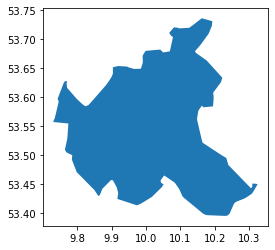

In [8]:
regs[regs.name == "02_Hamburg"].geometry.plot()

<GeoAxesSubplot:>

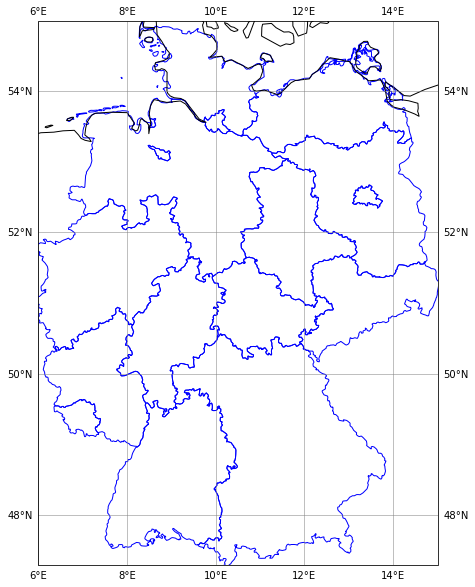

In [148]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

germany_bb = [5.98865807458, 15.0169958839, 47.3024876979, 54.983104153]
plt.figure(figsize=(15, 10))
projection = ccrs.PlateCarree()
rotated = ccrs.RotatedPole(*pole)
transform = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
# ax.set_aspect(2.0)
ax.set_extent(germany_bb, crs=projection)
ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    xlocs=range(-180, 180, 2),
    ylocs=range(-90, 90, 2),
)
# (ds.tas-273.5).isel(time=0).plot(ax=ax, transform=transform, x='lon', y='lat')
ax.coastlines(resolution="50m", color="black", linewidth=1)
regs.plot(ax=ax, edgecolor="b", facecolor="none", transform=projection)

In [155]:
%time savg = xe.SpatialAverager(ds, regs.geometry, geom_dim_name="country")
savg

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/xesmf/backend.py:38: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


CPU times: user 5.55 s, sys: 1 ms, total: 5.55 s
Wall time: 5.55 s


xESMF SpatialAverager 
Weight filename:            spatialavg_412x424_16.nc 
Reuse pre-computed weights? False 
Input grid shape:           (412, 424) 
Output list length:         16 

In [150]:
out = savg(ds)
out = out.assign_coords(country=xr.DataArray(regs["name"], dims=("country",)))
out

/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/work/ch0636/g300046/conda_envs/cmip6-processing/lib/python3.9/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


<xarray.Dataset>
Dimensions:       (vertices: 4, country: 16)
Coordinates:
    lon           (country) float64 10.02 9.16 8.742 7.562 ... 11.7 11.03 9.811
    lat           (country) float64 53.54 52.77 53.2 51.48 ... 52.01 50.9 54.18
  * country       (country) object '02_Hamburg' ... '01_Schleswig-Holstein'
Dimensions without coordinates: vertices
Data variables:
    lat_vertices  (vertices, country) float64 53.48 52.7 53.14 ... 50.85 54.13
    lon_vertices  (vertices, country) float64 9.945 9.085 8.655 ... 11.12 9.917
Attributes:
    regrid_method:  conservative

In [12]:
regs["field_avg"] = out.mean(dim="time").values
regs

ADE ARS         ARS_0                     GEN  \
0     2  02  020000000000                 Hamburg   
1     2  03  030000000000           Niedersachsen   
2     2  04  040000000000                  Bremen   
3     2  05  050000000000     Nordrhein-Westfalen   
4     2  06  060000000000                  Hessen   
5     2  07  070000000000         Rheinland-Pfalz   
6     2  08  080000000000       Baden-Württemberg   
7     2  09  090000000000                  Bayern   
8     2  10  100000000000                Saarland   
9     2  11  110000000000                  Berlin   
10    2  12  120000000000             Brandenburg   
11    2  13  130000000000  Mecklenburg-Vorpommern   
12    2  14  140000000000                 Sachsen   
13    2  15  150000000000          Sachsen-Anhalt   
14    2  16  160000000000               Thüringen   
15    2  01  010000000000      Schleswig-Holstein   

                                             geometry  \
0   POLYGON ((10.19113 53.72299, 10.18209 53.71002...   
1   MULTIPOLYGON (((6.80525 53.59771, 6.80398 53.5...   
2   MULTIPOLYGON (((8.52975 53.21639, 8.55399 53.2...   
3   POLYGON ((8.66673 52.52148, 8.70289 52.50052, ...   
4   POLYGON ((9.50561 51.62776, 9.50843 51.62712, ...   
5   POLYGON ((7.84659 50.87860, 7.85903 50.87733, ...   
6   MULTIPOLYGON (((8.66979 47.68564, 8.66565 47.6...   
7   POLYGON ((10.45456 47.55586, 10.47205 47.56964...   
8   POLYGON ((7.06854 49.62350, 7.08025 49.61197, ...   
9   POLYGON ((13.61191 52.54331, 13.62460 52.53797...   
10  POLYGON ((13.87356 53.47514, 13.91609 53.45651...   
11  MULTIPOLYGON (((11.48891 53.99901, 11.48059 53...   
12  POLYGON ((12.90084 51.64699, 12.91308 51.64488...   
13  POLYGON ((11.63624 53.00680, 11.64091 53.00601...   
14  POLYGON ((10.86498 51.62927, 10.89515 51.61114...   
15  MULTIPOLYGON (((8.68759 54.05943, 8.69257 54.0...   

                         name   field_avg  
0                  02_Hamburg  282.951355  
1            03_Niedersachsen  282.912018  
2                   04_Bremen  283.106079  
3      05_Nordrhein-Westfalen  283.066284  
4                   06_Hessen  282.594086  
5          07_Rheinland-Pfalz  282.802399  
6        08_Baden-Württemberg  282.485382  
7                   09_Bayern  281.837067  
8                 10_Saarland  282.862549  
9                   11_Berlin  283.241577  
10             12_Brandenburg  282.816559  
11  13_Mecklenburg-Vorpommern  282.538788  
12                 14_Sachsen  282.204895  
13          15_Sachsen-Anhalt  282.874268  
14               16_Thüringen  282.036011  
15      01_Schleswig-Holstein  282.602997

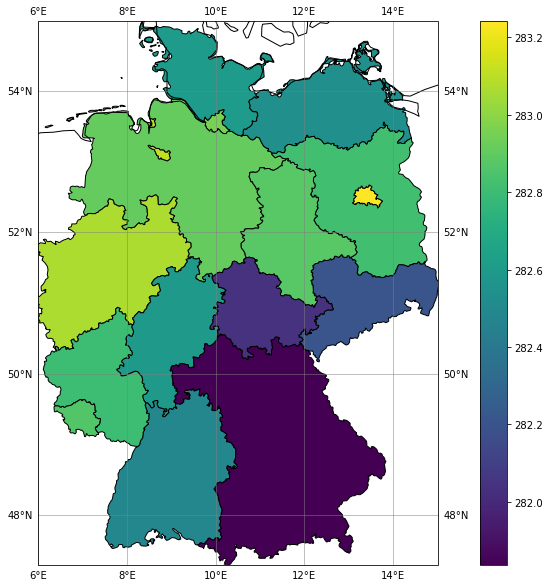

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
projection = ccrs.PlateCarree()
# rotated = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
ax = plt.axes(projection=projection)
# ax.set_aspect(2.0)
ax.set_extent(germany_bb, crs=projection)
ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    xlocs=range(-180, 180, 2),
    ylocs=range(-90, 90, 2),
)
# (ds.tas-273.5).isel(time=0).plot(ax=ax, transform=rotated, x='rlon', y='rlat')
ax.coastlines(resolution="50m", color="black", linewidth=1)
# ax.add_feature(cf.BORDERS, linewidth=2, color='r')
handles = regs.plot(column="field_avg", ax=ax, edgecolor="k", legend=True)

In [156]:
w = xr.DataArray(
    np.array(savg.weights).reshape(regs.geometry.size, *ds.lon.shape),
    dims=("country", *ds.lon.dims),
    coords=dict(country=out.country, **ds.lon.coords),
)

In [167]:
w.country

<xarray.DataArray 'country' (country: 16)>
array(['02_Hamburg', '03_Niedersachsen', '04_Bremen', '05_Nordrhein-Westfalen',
       '06_Hessen', '07_Rheinland-Pfalz', '08_Baden-Württemberg', '09_Bayern',
       '10_Saarland', '11_Berlin', '12_Brandenburg',
       '13_Mecklenburg-Vorpommern', '14_Sachsen', '15_Sachsen-Anhalt',
       '16_Thüringen', '01_Schleswig-Holstein'], dtype=object)
Coordinates:
  * country  (country) object '02_Hamburg' ... '01_Schleswig-Holstein'

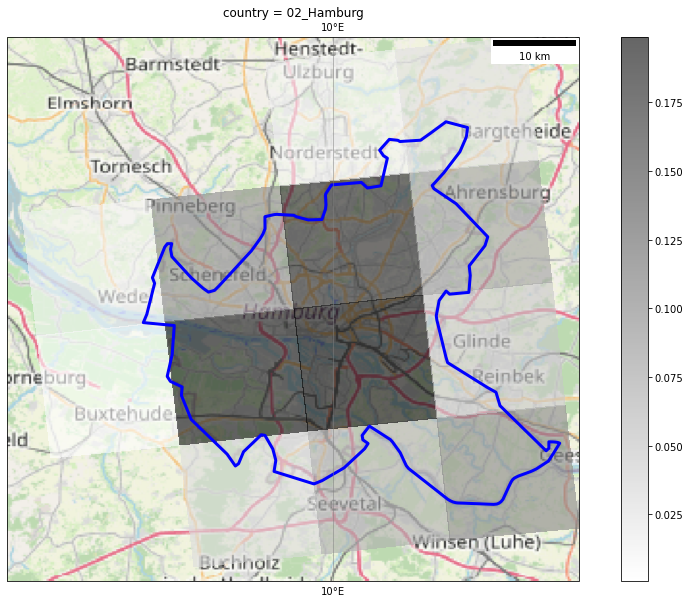

In [160]:
country = "02_Hamburg"
proj = ccrs.PlateCarree()

import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection=proj)
ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gray",
    xlocs=range(-180, 180, 1),
    ylocs=range(-90, 90, 1),
)
# ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cf.BORDERS)

try:
    ax.add_image(request, 9, interpolation="bilinear")
except:
    print("no image background")

subregion = w.sel(country=country)
subregion.where(subregion > 0, drop=True).plot(
    ax=ax, transform=rotated, cmap="binary", alpha=0.6
)
regs[regs.name == country].plot(
    ax=ax, edgecolor="b", linewidth=3, facecolor="none", transform=ccrs.PlateCarree()
)
ax.set_aspect(1.6)

try:
    import geopandas as gpd
    from matplotlib_scalebar.scalebar import ScaleBar
    from shapely.geometry.point import Point

    points = gpd.GeoSeries(
        [Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326
    )  # Geographic WGS 84 - degrees
    points = points.to_crs(32619)
    distance_meters = points[0].distance(points[1])
    ax.add_artist(ScaleBar(distance_meters))
except:
    print("no scalebar")

In [165]:
# Subplots are organized in a Rows x Cols Grid
# Tot and Cols are known
Tot = len(w.country)
Cols = 4
# Compute Rows required
Rows = Tot // Cols
Rows += Tot % Cols
# Create a Position index
Position = range(1, Tot + 1)

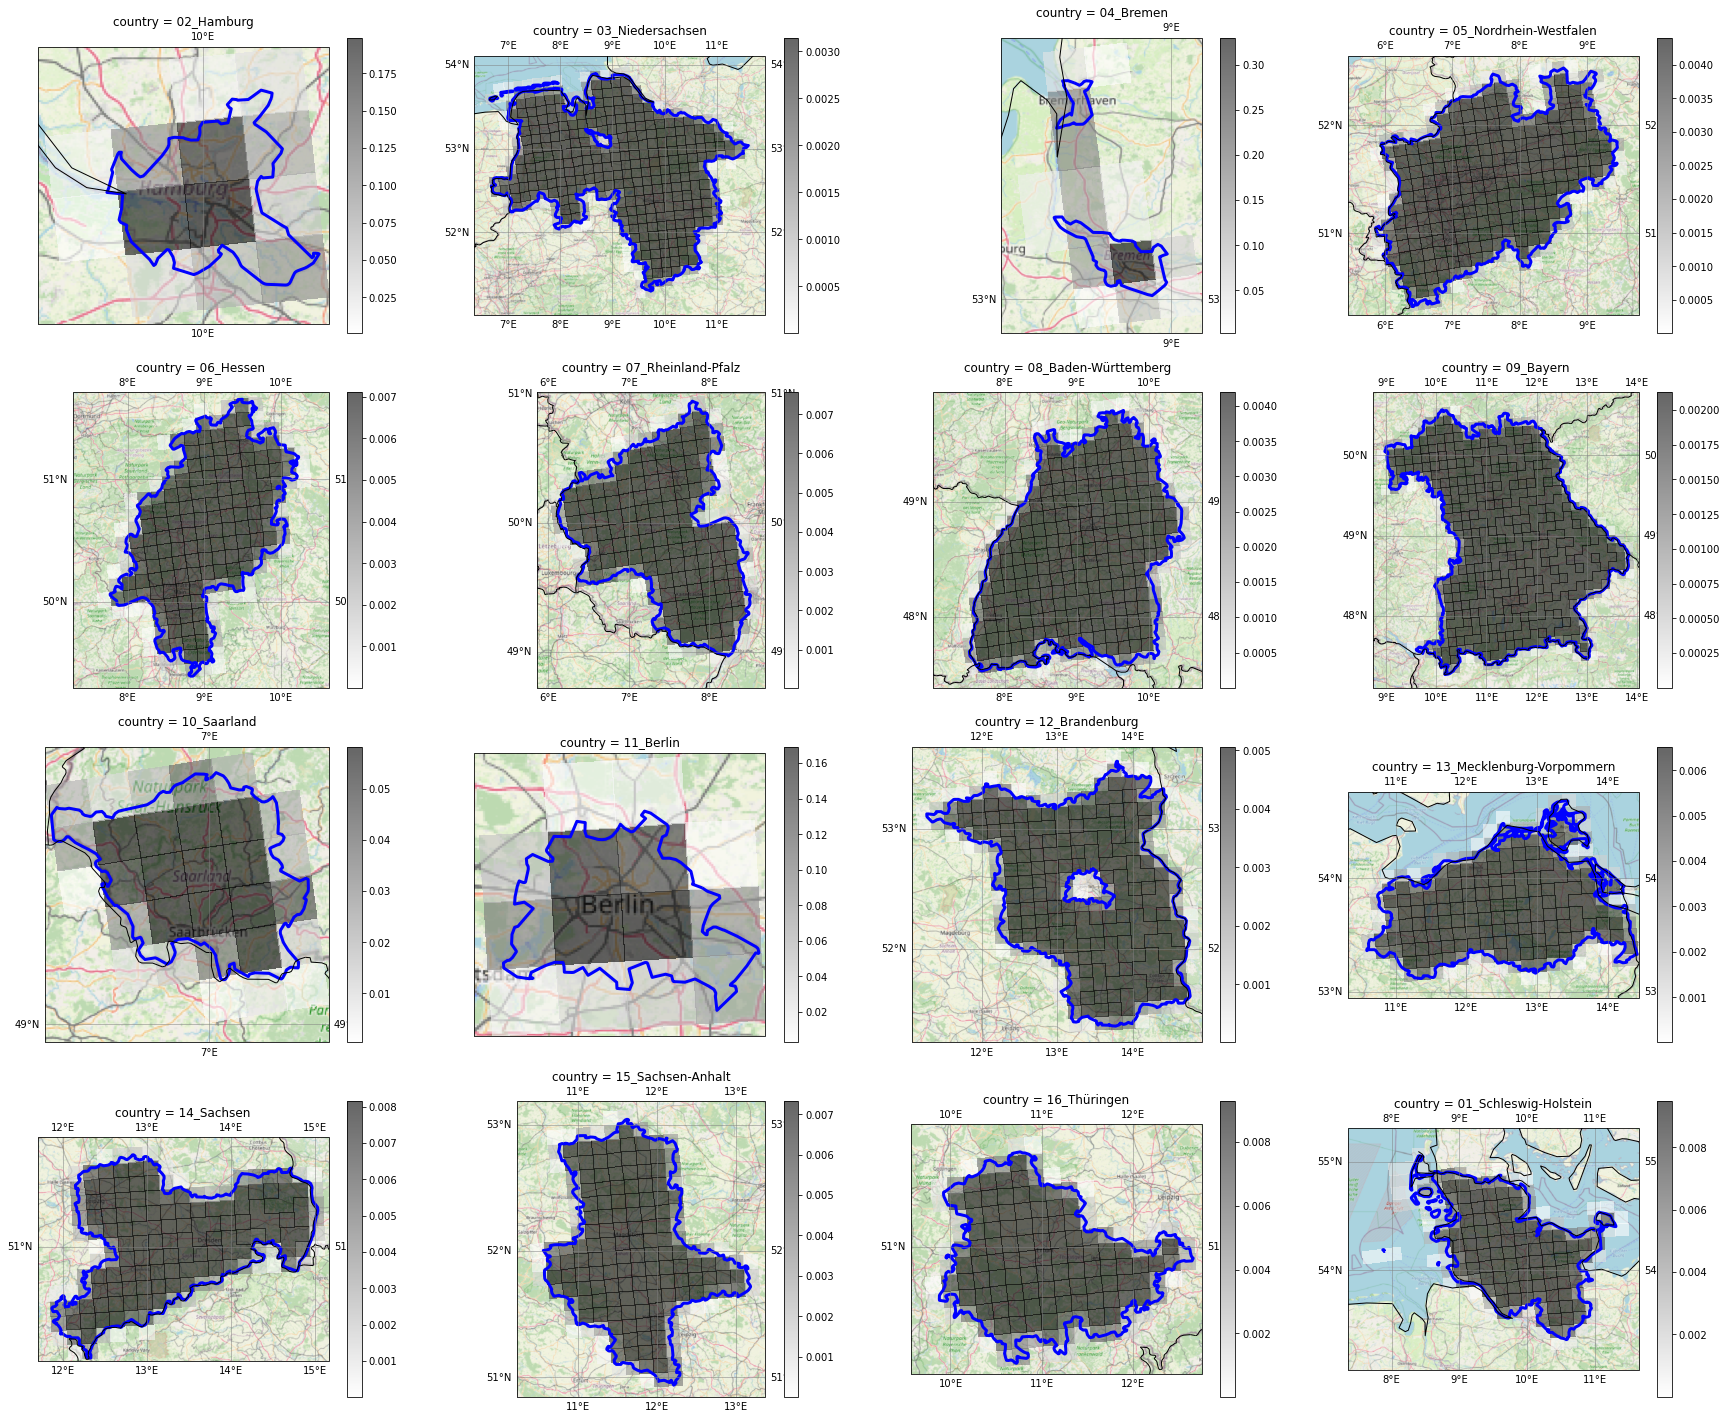

In [166]:
# Create main figure
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 25))
rotated = ccrs.RotatedPole(*pole)
proj = ccrs.PlateCarree()

for k in range(Tot):
    # add every single subplot to the figure with a for loop
    ax = fig.add_subplot(Rows, Cols, Position[k], projection=proj)
    ax.gridlines(
        draw_labels=True,
        linewidth=0.5,
        color="gray",
        xlocs=range(-180, 180, 1),
        ylocs=range(-90, 90, 1),
    )
    ax.coastlines(resolution="50m", color="black", linewidth=1)
    ax.add_feature(cf.BORDERS)
    ax.add_image(request, 8, interpolation="bilinear")
    subregion = w.isel(country=k)
    subregion.where(subregion > 0, drop=True).plot(
        ax=ax, transform=rotated, cmap="binary", alpha=0.6
    )
    regs[regs.name == str(subregion.country.values)].plot(
        ax=ax,
        edgecolor="b",
        linewidth=3,
        facecolor="none",
        transform=ccrs.PlateCarree(),
    )
    ax.set_aspect(1.6)